<a href="https://colab.research.google.com/github/musxeni/Predictive-Analytics-/blob/main/Adv_Sales_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

# Data

In [ ]:
adv_df = pd.read_csv('https://raw.githubusercontent.com/niteen11/data301_predictive_analytics_machine_learning/main/data/advertising_sales_prediction.csv')

# EDA

In [ ]:
adv_df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [ ]:
adv_df.shape

(200, 5)

In [ ]:
adv_df.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [ ]:
adv_df = adv_df.drop(columns=['Unnamed: 0'])

In [ ]:
adv_df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [ ]:
adv_df.isnull().values.any()

False

In [ ]:
X = adv_df[['TV', 'Radio', 'Newspaper']]

In [ ]:
X.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [ ]:
y = adv_df['Sales']

In [ ]:
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: Sales, dtype: float64

In [ ]:
X.shape

(200, 3)

In [ ]:
y.shape

(200,)

# Selecting the Model

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
linReg = LinearRegression()

# Data Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X,y)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(150, 3)
(50, 3)
(150,)
(50,)


# Train the Model

In [ ]:
linReg.fit(x_train,y_train)

LinearRegression()

In [ ]:
print(linReg.intercept_)

3.3264364550737735


In [ ]:
print(linReg.coef_)

[ 0.04556769  0.18310784 -0.00676605]


# Making predictions

In [ ]:
y_pred = linReg.predict(x_test)

In [ ]:
y_pred

array([17.46639885, 11.79351358, 23.81953859, 23.08104657, 15.05476881,
       12.76438969, 16.2348934 , 16.62596226, 12.46278005,  5.65124971,
        5.59874845,  8.34864356,  8.16742044, 22.68187544, 16.81222329,
       19.70951159,  7.78500792, 14.29339698,  9.11219014, 13.86750718,
       15.18745119,  8.46133615, 23.4747457 , 18.33981144, 17.79909857,
       18.41214186, 12.21349547, 12.34634322, 19.19656347, 10.10961255,
       10.88080623, 17.39648127, 14.73482313, 20.46299389, 12.80077354,
       11.54590433, 15.81512131, 12.24518795, 18.17897073,  8.67552958,
       16.1958086 , 17.4650533 , 20.26482745, 11.32211815,  4.68105453,
       21.02941414,  6.73010362, 10.55053968, 21.73192843,  6.50374862])

In [ ]:
print('Actual Values', y_test.values[0:10])

Actual Values [17.  11.8 26.2 25.4 15.2 11.4 14.8 17.3 12.9  7.6]


In [ ]:
print('predicted value', y_pred[0:10])

predicted value [17.46639885 11.79351358 23.81953859 23.08104657 15.05476881 12.76438969
 16.2348934  16.62596226 12.46278005  5.65124971]


# Measuring the Model Predictive Accuracy

In [ ]:
from sklearn import metrics

In [ ]:
mse = metrics.mean_squared_error(y_test,y_pred)

In [ ]:
mse

4.667052459162856

In [ ]:
np.sqrt(mse)

2.1603361912357197

In [ ]:
r2 = metrics.r2_score(y_test,y_pred)

In [ ]:
r2

0.8647761719007042

In [ ]:
y_test.head(10)

74     17.0
6      11.8
183    26.2
147    25.4
85     15.2
50     11.4
48     14.8
194    17.3
159    12.9
195     7.6
Name: Sales, dtype: float64

In [ ]:
y_pred[0:10]

array([17.46639885, 11.79351358, 23.81953859, 23.08104657, 15.05476881,
       12.76438969, 16.2348934 , 16.62596226, 12.46278005,  5.65124971])

# Plotting Actual vs Predicted

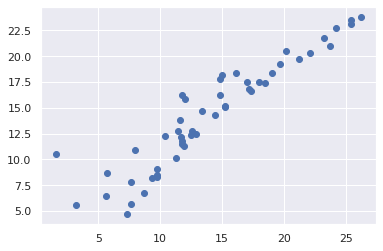

In [ ]:
plt.scatter(y_test,y_pred)

In [ ]:
adv_df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


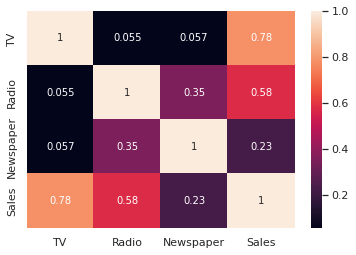

In [ ]:
sns.heatmap(adv_df.corr(),annot=True)